# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
from numpy import linalg
import numpy as np
def linan(param1:str, param2:str, count = 2) -> str:
   arr = np.array([[i, j] for i, j in zip(param1.split(),param2.split())]).astype(float)
   b,a = arr[-1], arr[:-1]
   a = np.concatenate((np.array([a[:,i] for i in range(count)]))).reshape(2,-1)
   return str(linalg.solve(a,b))[1:-1]

linan("1 2 3", "4 5 6")

'-1.  2.'

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
def decorate_matrix(n):
  ones = np.zeros((n, n))
  ones[-1,:] = ones[0,:] = ones[:,-1] = ones[:,0] = 1
  return ones
decorate_matrix(4)

array([[1., 1., 1., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

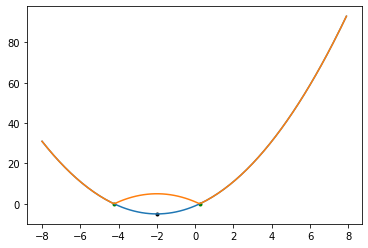

(-2, [0.2360679774997898, -4.23606797749979])

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def equationroots(a, b, c): 

    dis = b * b - 4 * a * c 
    sqrt_val = math.sqrt(abs(dis)) 

    if dis > 0: 
        return [(-b + sqrt_val)/(2 * a), (-b - sqrt_val)/(2 * a)]
      
    elif dis == 0: 
        return [-b / (2 * a),]
    else:
        assert False, "Complex Roots"
        # print(- b / (2 * a), " + i", sqrt_val) 
        # print(- b / (2 * a), " - i", sqrt_val) 

def function(a = 3, b = 4, visual = True):
  minfx = -a
  mingx = [-a] if -b >= 0 else equationroots(1, 2*a, a**2-b)
  if visual:
    x = np.arange(-4*a,4*a,0.1)
    fx = (x+a)**2 - b
    gx = abs((x+a)**2 - b)
    temp = [0,0] if len(mingx) == 2 else -b
    plt.scatter(minfx, -b,color = "black", marker='.')
    plt.scatter(mingx, temp,color = "green", marker='.')

    plt.plot(x,fx,label = "f(x)")
    plt.plot(x,gx,label ="g(x)")

    plt.show()
  return minfx, mingx
  
function(2,5)

# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

In [ ]:
continue

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
#1
import numpy as np
count_game = 10
count_people = 1000
games = np.random.randint(0,2,(count_game,count_people,10))
count = 0
check = np.ones(8)
for game in games:
  for line in game:
    if np.all(line == 1) or np.all(line == 0):
      count +=1 
print(count/count_game/count_people)


count = 0
sum = 0 
for game in games:
  for line in game:
    for idx, prob in enumerate(line):
      if prob == 1:
        sum += 1
      if idx > 1 and sum - idx <= -2:
        break
      if idx == 9:
        count +=1 
    sum = 0
print(count/count_game/count_people)

#3
count1 = 0
count2 = 0 
for game in games:
  for line in game:
    if np.all(line == 1 ) or np.all(line == 0):
      count1 +=1 
  if (count1 == 3):
    count2 += 1
    count1 = 0
print(count2/count_game/count_people)

0.0016
0.0551
0.0001
